In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Importing the Data File

In [2]:
data = pd.read_csv(r"C:\Users\iyano\Downloads\loan_dataset.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Analysing the Data

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The missing values can be dropped because they are little

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape

(480, 13)

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Visualising some of the data

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='Married', ylabel='count'>

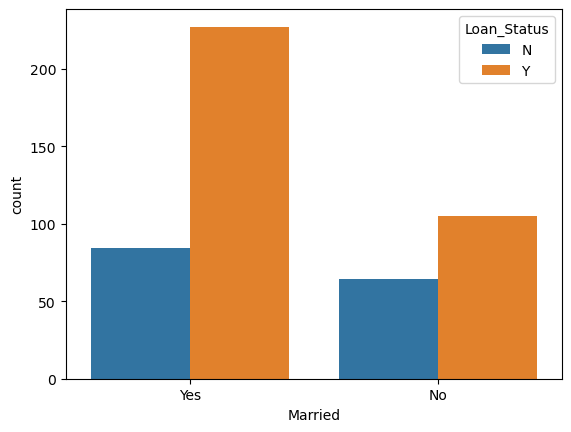

In [12]:
sns.countplot(data = data, x = 'Married', hue = 'Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

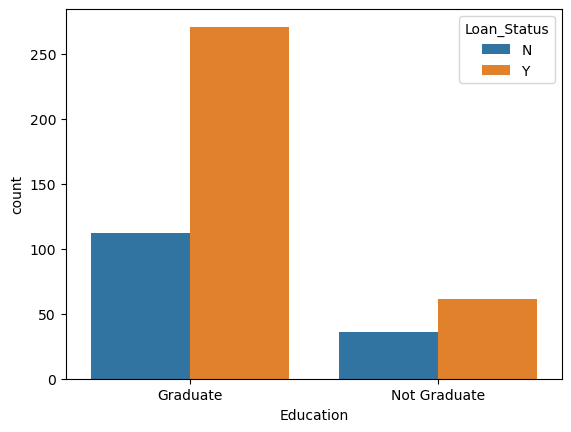

In [13]:
sns.countplot(data = data, x = 'Education', hue = 'Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

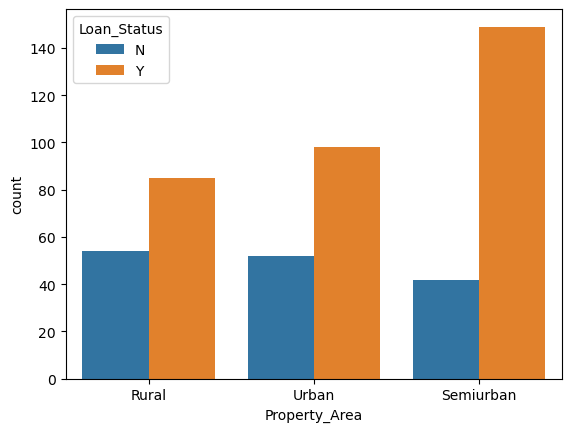

In [14]:
sns.countplot(data = data, x = 'Property_Area', hue = 'Loan_Status')

Grouping the data according to loan status

In [15]:
data.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,148,148,148,148,148,148,148,148,148,148,148,148
Y,332,332,332,332,332,332,332,332,332,332,332,332


Converting the categorical data to numertic to enable us build a model

In [16]:
List_of_categorical_data = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [17]:
data['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [18]:
data['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [19]:
data['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [20]:
data['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [21]:
data['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [22]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [23]:
data.replace({'Gender': {'Male': 0, 'Female': 1}, 'Dependents': {'0': 0, '1': 1, '2' : 2, '3+' : 3},'Married': {'No': 0, 'Yes': 1}, 'Education': {'Not Graduate': 0, 'Graduate': 1},
             'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban' : 2}, 'Loan_Status': {'N': 0, 'Y' : 1}}, inplace = True)

C:\Users\iyano\AppData\Local\Temp\ipykernel_14688\4252128536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender': {'Male': 0, 'Female': 1}, 'Dependents': {'0': 0, '1': 1, '2' : 2, '3+' : 3},'Married': {'No': 0, 'Yes': 1}, 'Education': {'Not Graduate': 0, 'Graduate': 1},
C:\Users\iyano\AppData\Local\Temp\ipykernel_14688\4252128536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Gender': {'Male': 0, 'Female': 1}, 'Dependents': {'0': 0, '1': 1, '2' : 2, '3+' : 3},'Married': {'No':

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Spliting the Data into X and Y

In [34]:
X = data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = data['Loan_Status']

print(X,Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1           1          1              0             4583   
2         0        1           0          1              1             3000   
3         0        1           0          0              0             2583   
4         0        0           0          1              0             6000   
5         0        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       1        0           0          1              0             2900   
610       0        1           3          1              0             4106   
611       0        1           1          1              0             8072   
612       0        1           2          1              0             7583   
613       1        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 4)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Introducing the Model to be used

In [37]:
model = svm.SVC(kernel = 'linear')

In [38]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [41]:
x_train_predict = model.predict(X_train)
x_train_accuracy = accuracy_score(x_train_predict, Y_train)
print(x_train_accuracy)

0.7994791666666666


In [42]:
x_test_predict = model.predict(X_test)
x_test_accuracy = accuracy_score(x_test_predict, Y_test)
print(x_test_accuracy)

0.8229166666666666
